In [1]:
import pandas as pd
import textstat

In [2]:
from bs4 import BeautifulSoup

In [3]:
from tqdm._tqdm_notebook import tqdm_notebook

C:\Users\alecr\Anaconda3\envs\gensim_env\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  """Entry point for launching an IPython kernel.


In [4]:
from langdetect import detect

In [61]:
import seaborn as sns

In [5]:
%config Completer.use_jedi = False

In [6]:
df = pd.read_csv(r"D:\data\openparliament\statements_nospeaker_en.csv")

df.drop(['Unnamed: 0'], axis=1, inplace=True)

C:\Users\alecr\Anaconda3\envs\gensim_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (20,23,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,slug,urlcache,h1_fr,h2_fr,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length
0,2611,3465,35066,4,2005-11-29,1997-09-22,232373,1878,2001-05-03 13:50:00-04,Government Orders,...,marlene-catterall-1,/debates/2001/5/3/marlene-catterall-1/,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'on', 'a'...",3
1,3210,3465,70224,4,1997-04-27,1994-01-17,232373,1878,2001-05-03 13:50:00-04,Government Orders,...,marlene-catterall-1,/debates/2001/5/3/marlene-catterall-1/,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'on', 'a'...",3
2,4305,173,70358,1,\N,2015-10-19,645329,388,2008-02-14 13:15:00-05,Routine Proceedings,...,tom-lukiwski-7,/debates/2008/2/14/tom-lukiwski-7/,NaN,NaN,NaN,NaN,NaN,\N,"['finally', ',', 'mr.', 'speaker', ',', 'i', '...",3
3,1534,173,47007,1,2015-10-19,2004-10-04,645329,388,2008-02-14 13:15:00-05,Routine Proceedings,...,tom-lukiwski-7,/debates/2008/2/14/tom-lukiwski-7/,NaN,NaN,NaN,NaN,NaN,\N,"['finally', ',', 'mr.', 'speaker', ',', 'i', '...",3
4,1541,43,47014,1,2015-10-19,2004-10-04,313253,1621,2004-02-06 10:05:00-05,NaN,...,garry-breitkreuz-1,/debates/2004/2/6/garry-breitkreuz-1/,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'today', ...",3


In [8]:
df.columns

Index(['id', 'politician_id', 'riding_id', 'party_id', 'end_date',
       'start_date', 'id.1', 'document_id', 'time', 'h1_en', 'h2_en',
       'member_id', 'who_en', 'content_en', 'sequence_en', 'wordcount',
       'politician_id.1', 'procedural', 'h3_en', 'who_hocid', 'content_fr',
       'statement_type', 'written_question', 'source_id', 'who_context_en',
       'slug', 'urlcache', 'h1_fr', 'h2_fr', 'h3_fr', 'who_fr',
       'who_context_fr', 'wordcount_en', 'tokenized_content', 'slug_length'],
      dtype='object')

In [9]:
content = df.tokenized_content

In [10]:
%%time
df['soup'] = df.content_en.apply(lambda x: BeautifulSoup(x).text)

Wall time: 3min 18s


In [11]:
df['text_len'] = df.soup.apply(len)

In [12]:
df = df[df.text_len>2]

In [13]:
content[0]

"['mr.', 'speaker', ',', 'i', 'rise', 'on', 'a', 'point', 'of', 'order', '.', 'i', 'believe', 'you', 'would', 'find', 'unanimous', 'consent', 'following', 'consultation', 'among', 'all', 'parties', 'to', 'further', 'defer', 'the', 'vote', 'just', 'deferred', 'until', 'monday', 'to', 'next', 'tuesday', 'at', 'the', 'end', 'of', 'government', 'orders', '.']"

In [14]:
import ast

In [15]:
ast.literal_eval(content[0])

['mr.',
 'speaker',
 ',',
 'i',
 'rise',
 'on',
 'a',
 'point',
 'of',
 'order',
 '.',
 'i',
 'believe',
 'you',
 'would',
 'find',
 'unanimous',
 'consent',
 'following',
 'consultation',
 'among',
 'all',
 'parties',
 'to',
 'further',
 'defer',
 'the',
 'vote',
 'just',
 'deferred',
 'until',
 'monday',
 'to',
 'next',
 'tuesday',
 'at',
 'the',
 'end',
 'of',
 'government',
 'orders',
 '.']

%%time
df['tokens'] = df.tokenized_content.apply(ast.literal_eval) 

In [16]:
%%time
df['reading_ease'] = df.soup.apply(textstat.flesch_reading_ease)

Wall time: 8min 16s


In [17]:
%%time
df['fk_reading_ease'] = df.soup.apply(textstat.flesch_kincaid_grade)

Wall time: 7min 40s


In [18]:
def ld (row):
    return detect(row['soup'])

In [19]:
df.fk_reading_ease.describe()

count    861391.000000
mean         14.377404
std          11.954982
min         -15.700000
25%           9.500000
50%          12.500000
75%          16.600000
max        1156.500000
Name: fk_reading_ease, dtype: float64

In [23]:
maybefrench = df[df.reading_ease<-2000] 

In [24]:
df[df.text_len<2]

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length,soup,text_len,fk_reading_ease,reading_ease


In [25]:
df[df.text_len<5]

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length,soup,text_len,fk_reading_ease,reading_ease
11002,1448,295,35104,1,2018-09-30,2004-10-04,781443,3150,2012-04-30 15:15:00-04,Oral Questions,...,NaN,NaN,NaN,\N,"['yes', '.']",4,Yes.,4,-3.5,121.22
39677,3198,279,35050,4,2011-03-26,1994-01-17,229984,1868,2001-04-05 15:20:00-04,Government Orders,...,NaN,NaN,NaN,\N,"['why', '?']",3,Why?,4,-3.5,121.22
53503,2645,4405,70155,4,2000-10-22,1997-09-22,224622,1850,2001-03-12 17:00:00-05,Government Orders,...,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,-3.5,121.22
53504,3182,4405,70213,4,1997-04-27,1994-01-17,224622,1850,2001-03-12 17:00:00-05,Government Orders,...,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,-3.5,121.22
53505,1649,4405,70073,4,2004-02-16,2001-01-29,224622,1850,2001-03-12 17:00:00-05,Government Orders,...,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,-3.5,121.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781890,4322,409,70268,1,2019-10-21,2015-10-19,2522450,19083,2017-12-12 12:20:00-05,Government Orders,...,NaN,Mme Sylvie Boucher,Beauport—Côte-de-Beaupré—Île d'Orléans—Charlev...,0,"['no', '.']",3,No.,4,8.4,36.62
781891,351,409,24007,1,2011-03-26,2006-04-03,2522450,19083,2017-12-12 12:20:00-05,Government Orders,...,NaN,Mme Sylvie Boucher,Beauport—Côte-de-Beaupré—Île d'Orléans—Charlev...,0,"['no', '.']",3,No.,4,8.4,36.62
792469,4225,9547,59004,1,\N,2015-10-19,2571350,19354,2018-04-17 13:15:00-04,Routine Proceedings,...,NaN,M. Todd Doherty,NaN,1,"['wow', '.']",3,Wow.,4,-3.5,121.22
808527,4298,306,35022,4,2019-10-21,2015-10-19,2641742,19697,2018-09-20 17:00:00-04,Private Members' Business,...,NaN,M. Borys Wrzesnewskyj,"Etobicoke-Centre, Lib.",1,"['no', '.']",3,No.,3,-3.5,121.22


I'm assuming that if the reading ease is above 20, it's in English, for now

In [20]:
english = df[df.reading_ease>20] 

In [21]:
english.shape

(775410, 39)

In [22]:
english.sort_values(by='reading_ease', ascending=False)

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length,soup,text_len,reading_ease,fk_reading_ease
781533,1071,573,35002,2,\N,2008-11-18,2520964,19079,2017-12-11 12:00:00-05,Private Members' Business,...,Reprise de la séance,NaN,NaN,0,[],3,,3,206.84,-15.7
639257,610,461,48022,1,2015-10-19,2006-04-03,2006800,16295,2014-06-16 23:55:00-04,Government Orders,...,NaN,M. Chris Warkentin,"Peace River, PCC",\N,"['more', '.']",3,More.,5,121.22,-3.5
329095,1507,23,24055,3,2014-08-25,2004-10-04,368279,1612,2005-11-22 17:00:00-05,Government Orders,...,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,121.22,-3.5
808528,1364,306,35022,4,2011-03-26,2004-10-04,2641742,19697,2018-09-20 17:00:00-04,Private Members' Business,...,NaN,M. Borys Wrzesnewskyj,"Etobicoke-Centre, Lib.",1,"['no', '.']",3,No.,3,121.22,-3.5
177262,1640,242,12005,4,\N,2001-01-29,263351,2006,2002-05-01 15:45:00-04,Routine Proceedings,...,NaN,NaN,NaN,\N,"['yes', '.']",3,Yes.,4,121.22,-3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199017,1469,36,24017,3,2011-03-26,2004-10-04,675791,500,2009-03-25 15:10:00-04,Routine Proceedings,...,NaN,NaN,NaN,\N,"['moved', 'for', 'leave', 'to', 'introduce', '...",3,"moved for leave to introduce Bill C-343, An A...",928,20.01,23.1
852965,4476,10628,24016,1,\N,2018-06-18,2832871,20718,2020-02-26 14:05:00-05,Statements by Members,...,NaN,"M. Richard Martel (Chicoutimi—Le Fjord, PCC)","Chicoutimi—Le Fjord, PCC",0,"['mr.', 'speaker', ',', 'people', 'in', 'the',...",3,"Mr. Speaker, people in the Saguenay—Lac-Saint-...",1011,20.01,23.1
809926,4378,8491,70288,2,2019-10-21,2015-10-19,2645124,19712,2018-09-28 11:20:00-04,Oral Questions,...,NaN,"M. Matthew Dubé (Beloeil—Chambly, NPD)","Beloeil—Chambly, NPD",0,"['mr.', 'speaker', ',', 'we', 'know', 'that', ...",3,"Mr. Speaker, we know that CSIS spied on envir...",510,20.01,16.9
346494,3335,121,70260,4,1997-04-27,1994-01-17,595706,210,2006-09-21 15:25:00-04,Routine Proceedings,...,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'if', 'i', 'could', 'd...",3,"Mr. Speaker, if I could direct my point to you...",946,20.01,23.1


In [23]:
reading_ease_party = df.pivot_table(values='reading_ease', index = "party_id", aggfunc='mean')

In [24]:
reading_ease_party.sort_values(by='reading_ease', ascending=False, inplace=True)

In [25]:
reading_ease_party

,reading_ease
party_id,
28,49.965355
25,49.170936
1,49.164895
46,49.129540
26,48.073650
2,47.864573
5,47.157679
4,46.043936
9,43.404443


In [26]:
party_df = pd.read_csv(r"D:\data\openparliament\core_party.csv", sep='\t', header=None)
party_names = ['id', 'name_en', 'slug','short_name_en', 'name_fr', 'short_name_fr']
party_df.columns = party_names

In [27]:
reading_ease_party = reading_ease_party.merge(party_df, how='inner', left_on='party_id', right_on='id')

In [28]:
reading_ease_party

,reading_ease,id,name_en,slug,short_name_en,name_fr,short_name_fr
0,49.965355,28,Reform Party of Canada,reform,Reform,Reform Party of Canada,Reform
1,49.170936,25,Canadian Alliance,alliance,Canadian Alliance,Canadian Alliance,Canadian Alliance
2,49.164895,1,Conservative Party of Canada,cpc,Conservative,Parti conservateur du Canada,Conservateur
3,49.129540,46,Québec debout,NaN,Québec debout,Québec debout,Québec debout
4,48.073650,26,Progressive Conservative,pc,Progressive Conservative,Progressive Conservative,Progressive Conservative
5,47.864573,2,New Democratic Party,NDP,NDP,Nouveau Parti démocratique,NPD
6,47.157679,5,Independent,IND,Independent,Indépendant,Indépendant
7,46.043936,4,Liberal Party of Canada,liberal,Liberal,Parti libéral du Canada,Libéral
8,43.404443,9,Green Party of Canada,green,Green,Parti verti du Canada,Vert
9,42.163628,3,Bloc Québécois,bloc,Bloc,Bloc Québécois,Bloc


In [29]:
fk_party = english.pivot_table(values='fk_reading_ease', index = "party_id", aggfunc='mean')

In [30]:
fk_party =  fk_party.merge(party_df, how='inner', left_on='party_id', right_on='id')

In [32]:
fk_party.sort_values(by='fk_reading_ease',ascending=False, inplace=True)

In [33]:
fk_party

,fk_reading_ease,id,name_en,slug,short_name_en,name_fr,short_name_fr
9,13.504516,39,Forces et Démocratie,forces,Forces et Démocratie,Forces et Démocratie,Forces et Démocratie
2,13.046528,3,Bloc Québécois,bloc,Bloc,Bloc Québécois,Bloc
5,12.898867,9,Green Party of Canada,green,Green,Parti verti du Canada,Vert
3,12.267944,4,Liberal Party of Canada,liberal,Liberal,Parti libéral du Canada,Libéral
7,12.248968,26,Progressive Conservative,pc,Progressive Conservative,Progressive Conservative,Progressive Conservative
4,12.184059,5,Independent,IND,Independent,Indépendant,Indépendant
1,12.097434,2,New Democratic Party,NDP,NDP,Nouveau Parti démocratique,NPD
6,11.993319,25,Canadian Alliance,alliance,Canadian Alliance,Canadian Alliance,Canadian Alliance
8,11.855274,28,Reform Party of Canada,reform,Reform,Reform Party of Canada,Reform
0,11.848137,1,Conservative Party of Canada,cpc,Conservative,Parti conservateur du Canada,Conservateur


In [39]:
reading_ease_politician = df.pivot_table(values='reading_ease', index = "politician_id", aggfunc='mean')

In [35]:
df_electedmember = pd.read_csv(r"D:\data\openparliament\politician_info.csv")

In [36]:
df_electedmember.head()

,Unnamed: 0,id,politician_id,riding_id,party_id,end_date,start_date,name,short_name,slug
0,0,4015,2693,70159,5,2000-09-11,2000-04-02,André Harvey,André,Harvey
1,1,4016,2693,70159,4,2001-01-28,2000-09-12,André Harvey,André,Harvey
2,2,2676,2693,70159,26,2000-04-01,1997-09-22,André Harvey,André,Harvey
3,3,1774,2693,24016,4,2004-05-23,2001-01-29,André Harvey,André,Harvey
4,4,4017,4136,59023,4,2005-05-23,2002-01-28,Joe Peschisolido,Joe,Peschisolido


In [40]:
reading_ease_politician = reading_ease_politician.merge(df_electedmember, how='inner', left_on='politician_id', right_on='politician_id')

In [41]:
reading_ease_politician.sort_values(by='reading_ease', ascending=False, inplace=True)

In [43]:
#reading_ease_politician.head()

In [44]:
from matplotlib import pyplot as plt

In [45]:
reading_ease_party.slug.fillna('', inplace=True)

In [51]:
party_colours = ['blue', 'blue', 'blue', 'turquoise', 'blue','orange','grey',
                'red', 'green', 'black', 'turquoise']

In [47]:
reading_ease_party.loc[3,'slug'] = 'QD'

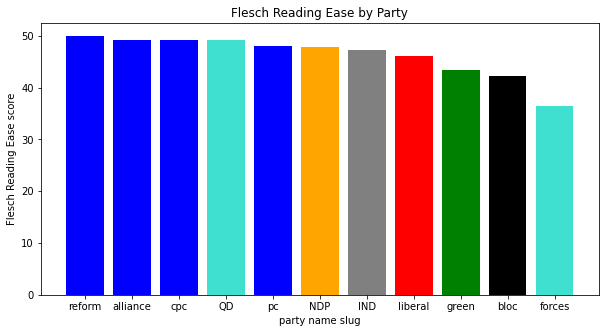

In [48]:
plt.figure(figsize=(10,5))
plt.title('Flesch Reading Ease by Party')
plt.xlabel('party name slug')
plt.ylabel('Flesch Reading Ease score')
plt.bar(reading_ease_party.slug, reading_ease_party.reading_ease, 
        color=party_colours)

plt.show()
#plt.savefig(r'C:\Users\alecr\Projects\openparliament-NLP\word_stats\flesch_by_party.png')

In [52]:
party_colour_dict = {28:'blue',25: 'blue', 1:'blue', 46:'turquoise', 26: 'blue',2: 'orange',5: 'grey',
                4: 'red', 9: 'green', 3: 'black', 39: 'turquoise'}

In [53]:
reading_ease_politician['party_colour'] = reading_ease_politician.party_id.replace(party_colour_dict)

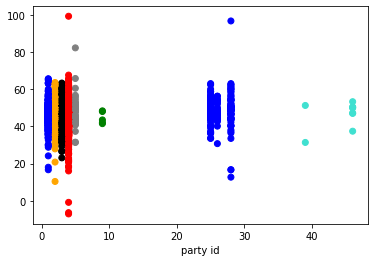

In [54]:
plt.scatter(reading_ease_politician.party_id, reading_ease_politician.reading_ease,c=reading_ease_politician.party_colour)
plt.xlabel('party id')
plt.show()

In [ ]:
reading_ease_politician.sort_values(by='reading_ease', ascending=True)

In [ ]:
df_environment = df[df.h2_en=='The Environment']

In [55]:
fk_politician = english.pivot_table(values='fk_reading_ease', index = "politician_id", aggfunc='mean')

In [56]:
fk_politician = fk_politician.merge(df_electedmember, how='inner', left_on='politician_id', right_on='politician_id')

In [57]:
fk_politician['party_colour'] = fk_politician.party_id.replace(party_colour_dict)

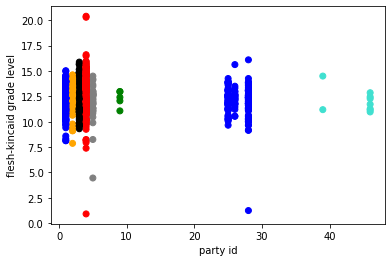

In [60]:
plt.scatter(fk_politician.party_id, fk_politician.fk_reading_ease,c=fk_politician.party_colour)
plt.xlabel('party id')
plt.ylabel('flesh-kincaid grade level')
plt.show()

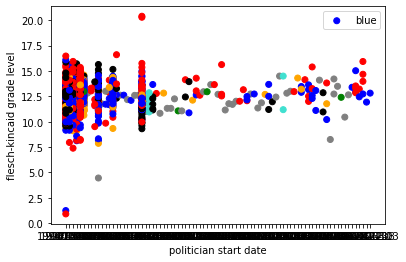

In [67]:
plt.scatter(fk_politician.start_date, fk_politician.fk_reading_ease, c=fk_politician.party_colour)
plt.xlabel('politician start date')
plt.ylabel('flesch-kincaid grade level')
plt.legend(fk_politician.party_colour)
plt.show()

In [64]:
fk_politician.shape

(1499, 12)

In [ ]:
df_environment.shape

In [ ]:
df_environment.pivot_table(values='reading_ease',index='party_id',aggfunc='mean').sort_values(by='reading_ease', ascending=False)

In [ ]:
def getReadingEaseBy_h2_Topic(topic):
    topic_pivot = df[df.h2_en==topic].pivot_table(values='reading_ease',index='party_id',aggfunc='mean')
    topic_pivot.sort_values(by='reading_ease', ascending=False, inplace = True)
    return topic_pivot

In [ ]:
getReadingEaseBy_h2_Topic('Committees of the House')

In [ ]:
df_carbon = df[df.h2_en.str.contains('Carbon')]

In [ ]:
df_carbon.pivot_table(values='reading_ease', index='party_id', aggfunc='mean').sort_values(by='reading_ease', ascending=False)

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob(df_carbon.soup.iloc[0]).sentiment

In [ ]:
df_carbon['sentiment'] = df_carbon.soup.apply(lambda x: TextBlob(x).sentiment[0])

In [ ]:
df_carbon['subjectivity'] = df_carbon.soup.apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
green_sentiments = df_carbon[df_carbon.party_id==9].sentiment

In [ ]:
df[df.h3_en =='Cancellation of Teck Frontier Mine Project'].soup

In [ ]:
df.columns

In [ ]:
df['end_date'][0]

In [ ]:
df['start_date'][0]

In [ ]:
sentiments = df.groupby(['h2_en', 'party_id'])

for h in df.h2_en[:50]:
    print('\n',h)

In [ ]:
type(sentiments)

In [ ]:
df = pd.DataFrame({'A':[1,2],'B':[3,4]})

In [ ]:
utt = df.pivot_table(values='content_en',index='politician_id',aggfunc='count')

In [ ]:
 df_vocab = pd.read_csv(r"D:\data\openparliament\vocab_count_df")

In [ ]:
df_vocab.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
len(df[df.party_id==39].soup)

In [ ]:
df.columns

note: save with soup, eliminate unnecessary columns, processing every time is ridiculous